# Imports

In [1]:
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

# KMean  

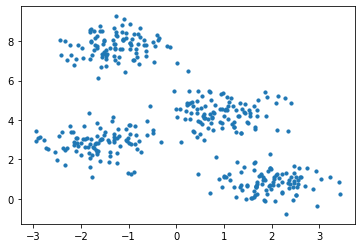

In [2]:
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

# Plot the scatter plot of X data
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.show()

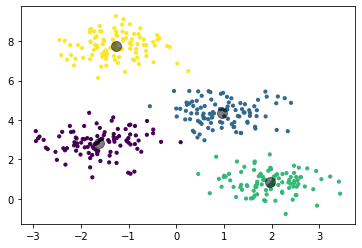

In [3]:
# use KMeans from sklearn.cluster library and fit it on X. Set the number of clusters 4.
kmeans = KMeans(n_clusters=4)
predicted_y = kmeans.fit(X).predict(X)

# the scatter plot after clustering which shows different clusters
plt.scatter(X[:, 0], X[:, 1], s=10 ,c=predicted_y, cmap='viridis')

# the final centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

# Iterative KMeans

In [4]:
# complete the two following functions fuctions

# Write a function that plot the points after clustering
def draw_points(X, ax, c, factor=1, alpha=0.3):
    ax.scatter(X[:, 0], X[:, 1], c=c, s=20 * factor, alpha=alpha)    

# Write a function that plot centers of functions
def draw_centers(k, ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=50 * factor, alpha=alpha)    

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

Text(0.98, 0.98, 'Final Clustering')

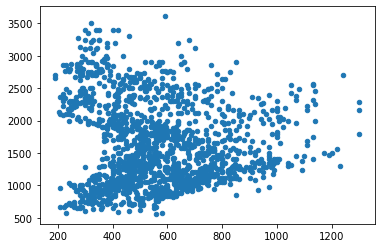

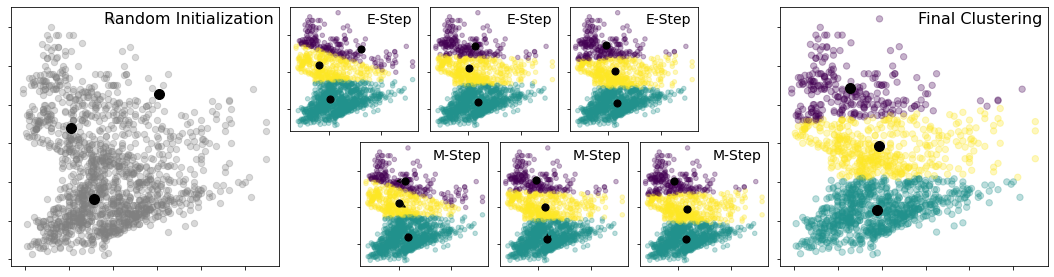

In [5]:
# read the data saved in 'data1.csv' file and save it into a numpy array called 'data1'. Plot the scatter of data1
df = pd.read_csv('data1.csv')
data1 = df.to_numpy()
plt.scatter(data1[:,0], data1[:,1],s=20)

# save the number of instances and dimensions in m and d respectively
m = len(data1)
d = data1.ndim

# number of clusters
k = 3

# Initialization of the model
# select k of the data points in data1 randomly to be the random centers in the first iteration
randomRow = np.random.randint(m, size=k)
centers=data1[randomRow, :]

fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes, ha='right', va='top', size=16)
draw_points(data1, ax0, 'gray', factor=2, alpha=0.3)
draw_centers(k, ax0, centers, factor=2)

for i in range(k):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(data1, centers)
    draw_points(data1, ax1, y_pred)
    draw_centers(k, ax1, centers)
    
    # M-step
    # find the new centers
    new_centers=centers
    for i in range(k):
        new_centers[i, :] = np.mean(data1[y_pred == i, :], axis=0)
    
    draw_points(data1, ax2, y_pred)
    draw_centers(k, ax2, centers, alpha=0.3)
    draw_centers(k, ax2, new_centers)
    for i in range(k):
        ax2.annotate('', new_centers[i], centers[i], arrowprops=dict(arrowstyle='->', linewidth=1))
        
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)

# Final E-step    
y_pred = pairwise_distances_argmin(data1, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(data1, axf, y_pred, factor=2)
draw_centers(k, axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes, ha='right', va='top', size=16)

# Different ks

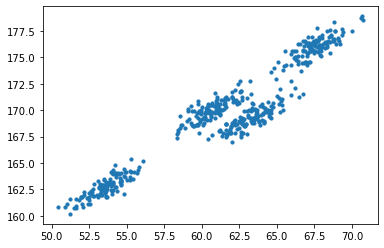

In [6]:
# read the data saved in 'data2.csv' file and save it into a numpy array called 'data2'. Plot the scatter of data2.
df2 = pd.read_csv('data2.csv')
data2 = df2.to_numpy()
plt.scatter(data2[:,0], data2[:,1],s=10)

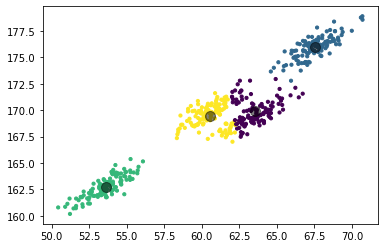

In [7]:
# use KMeans from sklearn.cluster library and fit it on data2. Set the number of clusters 4.
# Plot the scatter after clustering and also the center of each cluster
kmeans = KMeans(n_clusters=4)
predicted_y = kmeans.fit(data2).predict(data2)

# the scatter plot after clustering which shows different clusters
plt.scatter(data2[:, 0], data2[:, 1], s=10 ,c=predicted_y, cmap='viridis')

# the final centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

In [8]:
# you can find the cluster of each instance after clustering
kmeans.labels_
df2['cluster'] = kmeans.labels_
df2

,Weight,Height,cluster
0,67.062924,176.086355,1
1,68.804094,178.388669,1
2,60.930863,170.284496,3
3,59.733843,168.691992,3
4,65.431230,173.763679,1
...,...,...,...
495,59.976983,169.679741,3
496,66.423814,174.625574,1
497,53.604698,161.919208,2
498,50.433644,160.794875,2


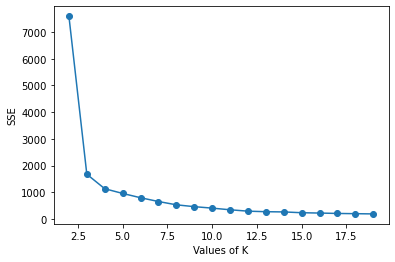

In [9]:
# list of some posssible Ks. These Ks are candidate for number of clusters
Ks = range(2, 20)
results = []

# fit the KMeans for each K, and save the sum of squared distances of samples to their closest cluster center for each 
# model in the result. 
# the sum of squared distances of samples to their closest cluster center is saved in one of the outputs of KMeans
# model. You can find it by reading the documentation of the library

for k in Ks:
    kmeans = KMeans(n_clusters=k).fit(data2)
    results.append(kmeans.inertia_)


plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("SSE")
plt.show()